In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
import numpy as np
import pandas as pd

In [4]:
# just do gb1
ss_df = pd.read_csv('results/simulations/DE-active/scale2max/GB1-single_step_DE.csv')
recomb_df = pd.read_csv("results/simulations/DE-active/scale2max/GB1-recomb_SSM.csv")

In [19]:
mlde_all = pd.read_csv("results/mlde/vis_5/all_df.csv")

In [24]:
mlde_df = mlde_all[
    (mlde_all["lib"] == "GB1")
    & (mlde_all["n_mut_cutoff"] == "all")
    # & (mlde_all["zs"] == "none")
    & (mlde_all["encoding"] == "one-hot")
]
mlde_df

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
28200,one-hot,boosting,24,80000,0,0.072955,0.005065,0.394481,0.051453,0.721916,0.242990,0.0,147255.0,all,GB1,Triad_score,384,max
28201,one-hot,boosting,24,80000,1,0.333146,0.023044,0.825004,0.072032,0.699861,0.194914,0.0,109640.0,all,GB1,Triad_score,384,max
28202,one-hot,boosting,24,80000,2,0.256787,0.016666,0.862463,0.256084,0.757104,0.204045,0.0,1988.0,all,GB1,Triad_score,384,max
28203,one-hot,boosting,24,80000,3,0.101392,0.004430,0.579921,0.032735,0.688521,0.091627,0.0,27635.0,all,GB1,Triad_score,384,max
28204,one-hot,boosting,24,80000,4,0.053502,0.003218,0.084428,0.003339,0.675421,0.162235,0.0,24097.0,all,GB1,Triad_score,384,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737995,one-hot,ridge,576,20000,45,0.210550,-0.005954,0.646607,0.214532,0.831764,0.406160,0.0,864.0,all,GB1,structnmsa-comb_score,96,max
1737996,one-hot,ridge,576,20000,46,0.292574,0.007688,0.918190,0.259079,0.827513,0.406078,0.0,946.0,all,GB1,structnmsa-comb_score,96,max
1737997,one-hot,ridge,576,20000,47,0.230276,-0.006574,1.000000,0.361062,0.852400,0.431945,1.0,22.0,all,GB1,structnmsa-comb_score,96,max
1737998,one-hot,ridge,576,20000,48,0.251185,-0.014384,0.862211,0.324666,0.852385,0.477302,0.0,610.0,all,GB1,structnmsa-comb_score,96,max


In [25]:
mlde_df[
    (mlde_df["zs"] == "ev_score")
]

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
821400,one-hot,boosting,24,80000,0,0.165063,0.014261,0.404353,0.013267,0.668007,0.123302,0.0,136664.0,all,GB1,ev_score,384,max
821401,one-hot,boosting,24,80000,1,0.170709,0.009690,0.392513,0.011963,0.677876,0.234731,0.0,42859.0,all,GB1,ev_score,384,max
821402,one-hot,boosting,24,80000,2,0.011884,0.001153,0.264161,0.005060,0.649873,0.043735,0.0,138211.0,all,GB1,ev_score,384,max
821403,one-hot,boosting,24,80000,3,0.196685,0.016225,0.314344,0.004715,0.666143,0.115425,0.0,32572.0,all,GB1,ev_score,384,max
821404,one-hot,boosting,24,80000,4,0.405699,0.031025,0.396512,0.006638,0.654674,0.195009,0.0,21718.0,all,GB1,ev_score,384,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827995,one-hot,ridge,1920,20000,45,0.174610,-0.002222,0.918190,0.326006,0.874236,0.488608,0.0,828.0,all,GB1,ev_score,96,max
827996,one-hot,ridge,1920,20000,46,0.188961,-0.005079,0.862211,0.400861,0.887198,0.488637,0.0,246.0,all,GB1,ev_score,96,max
827997,one-hot,ridge,1920,20000,47,0.162856,0.002041,0.831130,0.323568,0.880056,0.506738,0.0,214.0,all,GB1,ev_score,96,max
827998,one-hot,ridge,1920,20000,48,0.172187,-0.005345,0.918190,0.416883,0.895939,0.518019,0.0,432.0,all,GB1,ev_score,96,max


In [26]:
mlde_df[
    (mlde_df["zs"] == "ev_score")
    & (mlde_df["ft_lib"] == mlde_df["ft_lib"].min())
]

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
821500,one-hot,boosting,24,20000,0,0.457788,0.038105,0.442896,0.019919,0.676072,0.085179,0.0,22679.0,all,GB1,ev_score,384,max
821501,one-hot,boosting,24,20000,1,0.105406,0.003126,0.742925,0.074286,0.712759,0.231499,0.0,8636.0,all,GB1,ev_score,384,max
821502,one-hot,boosting,24,20000,2,0.323005,0.018781,0.540974,0.047693,0.679787,0.176252,0.0,15355.0,all,GB1,ev_score,384,max
821503,one-hot,boosting,24,20000,3,0.274531,0.019864,0.596812,0.028866,0.686522,0.113859,0.0,2488.0,all,GB1,ev_score,384,max
821504,one-hot,boosting,24,20000,4,0.444473,0.022940,0.598350,0.012245,0.673048,0.035612,0.0,148030.0,all,GB1,ev_score,384,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827995,one-hot,ridge,1920,20000,45,0.174610,-0.002222,0.918190,0.326006,0.874236,0.488608,0.0,828.0,all,GB1,ev_score,96,max
827996,one-hot,ridge,1920,20000,46,0.188961,-0.005079,0.862211,0.400861,0.887198,0.488637,0.0,246.0,all,GB1,ev_score,96,max
827997,one-hot,ridge,1920,20000,47,0.162856,0.002041,0.831130,0.323568,0.880056,0.506738,0.0,214.0,all,GB1,ev_score,96,max
827998,one-hot,ridge,1920,20000,48,0.172187,-0.005345,0.918190,0.416883,0.895939,0.518019,0.0,432.0,all,GB1,ev_score,96,max


In [11]:
mlde_all[
    (mlde_all["lib"] == "DHFR")
    & (mlde_all["n_mut_cutoff"] == "double")
    & (mlde_all["zs"] == "ev_score")
    & (mlde_all["encoding"] == "one-hot")
]

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
1022400,one-hot,boosting,24,1141,0,0.536288,0.147306,0.865538,0.459167,0.836442,0.168586,0.0,5451.0,double,DHFR,ev_score,384,max
1022401,one-hot,boosting,24,1141,1,0.755212,0.191287,1.000000,0.392332,0.829885,0.250487,1.0,29.0,double,DHFR,ev_score,384,max
1022402,one-hot,boosting,24,1141,2,0.778127,0.154128,0.865538,0.450450,0.837586,0.167800,0.0,6284.0,double,DHFR,ev_score,384,max
1022403,one-hot,boosting,24,1141,3,0.740532,0.161049,0.865538,0.435813,0.841627,0.134116,0.0,6796.0,double,DHFR,ev_score,384,max
1022404,one-hot,boosting,24,1141,4,0.804515,0.204888,0.959943,0.171294,0.782483,0.265959,0.0,1149.0,double,DHFR,ev_score,384,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026795,one-hot,ridge,1920,1000,45,0.786175,0.224222,1.000000,0.613429,0.939769,0.352664,1.0,16.0,double,DHFR,ev_score,96,max
1026796,one-hot,ridge,1920,1000,46,0.795352,0.224927,1.000000,0.618965,0.939728,0.355468,1.0,17.0,double,DHFR,ev_score,96,max
1026797,one-hot,ridge,1920,1000,47,0.802991,0.224841,1.000000,0.613442,0.938470,0.355778,1.0,16.0,double,DHFR,ev_score,96,max
1026798,one-hot,ridge,1920,1000,48,0.796442,0.223156,1.000000,0.607169,0.938567,0.356155,1.0,16.0,double,DHFR,ev_score,96,max


In [13]:
mlde_all[
    (mlde_all["lib"] == "DHFR")
    & (mlde_all["n_sample"] == 24)
    & (mlde_all["n_mut_cutoff"] == "double")
    & (mlde_all["zs"] == "ev_score")
    & (mlde_all["encoding"] == "one-hot")
].ft_lib.unique()

array([1141, 1000])

In [14]:
mlde_all[
    (mlde_all["lib"] == "GB1")
    & (mlde_all["n_sample"] == 24)
    & (mlde_all["n_mut_cutoff"] == "double")
    & (mlde_all["zs"] == "ev_score")
    & (mlde_all["encoding"] == "one-hot")
]

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
1030400,one-hot,boosting,24,2168,0,0.351397,0.040392,0.263546,0.013407,0.658001,0.070272,0.0,110130.0,double,GB1,ev_score,384,max
1030401,one-hot,boosting,24,2168,1,0.422935,0.029134,0.598350,0.024670,0.680931,0.056634,0.0,126137.0,double,GB1,ev_score,384,max
1030402,one-hot,boosting,24,2168,2,0.419711,0.044598,0.441234,0.035481,0.672765,0.145577,0.0,17829.0,double,GB1,ev_score,384,max
1030403,one-hot,boosting,24,2168,3,0.164352,0.010907,0.483097,0.033422,0.688130,0.113816,0.0,79092.0,double,GB1,ev_score,384,max
1030404,one-hot,boosting,24,2168,4,0.388545,0.030465,0.790720,0.025510,0.671008,0.177306,0.0,7623.0,double,GB1,ev_score,384,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030745,one-hot,ridge,24,2168,45,0.320160,0.046933,0.735277,0.281552,0.746620,0.118537,0.0,89878.0,double,GB1,ev_score,96,max
1030746,one-hot,ridge,24,2168,46,0.142628,0.024326,0.407331,0.042762,0.692777,0.212097,0.0,94752.0,double,GB1,ev_score,96,max
1030747,one-hot,ridge,24,2168,47,0.177051,0.034388,0.596812,0.113123,0.702455,0.143776,0.0,10448.0,double,GB1,ev_score,96,max
1030748,one-hot,ridge,24,2168,48,0.456744,0.069200,0.831130,0.095837,0.707851,0.148555,0.0,417.0,double,GB1,ev_score,96,max


In [16]:
gb1_df = mlde_all[
    (mlde_all["lib"] == "GB1")
    & (mlde_all["n_mut_cutoff"] == "double")
    # & (mlde_all["zs"] == "none")
    & (mlde_all["encoding"] == "one-hot")
]
gb1_df

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
237200,one-hot,boosting,24,2168,0,0.351397,0.040392,0.263546,0.013407,0.658001,0.070272,0.0,110130.0,double,GB1,Triad_score,384,max
237201,one-hot,boosting,24,2168,1,0.422935,0.029134,0.598350,0.024670,0.680931,0.056634,0.0,126137.0,double,GB1,Triad_score,384,max
237202,one-hot,boosting,24,2168,2,0.419711,0.044598,0.441234,0.035481,0.672765,0.145577,0.0,17829.0,double,GB1,Triad_score,384,max
237203,one-hot,boosting,24,2168,3,0.164352,0.010907,0.483097,0.033422,0.688130,0.113816,0.0,79092.0,double,GB1,Triad_score,384,max
237204,one-hot,boosting,24,2168,4,0.388545,0.030465,0.790720,0.025510,0.671008,0.177306,0.0,7623.0,double,GB1,Triad_score,384,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495995,one-hot,ridge,1920,2168,45,0.234614,-0.036461,0.620935,0.337029,0.818378,0.378981,0.0,192.0,double,GB1,none,96,max
1495996,one-hot,ridge,1920,2168,46,0.258110,-0.032177,0.658760,0.363598,0.807713,0.355350,0.0,551.0,double,GB1,none,96,max
1495997,one-hot,ridge,1920,2168,47,0.255668,-0.036707,0.658760,0.342149,0.810750,0.366558,0.0,670.0,double,GB1,none,96,max
1495998,one-hot,ridge,1920,2168,48,0.232863,-0.041733,0.658760,0.371134,0.813801,0.353252,0.0,225.0,double,GB1,none,96,max


In [6]:
mlde_df.n_sample.unique()

array([  24,   48,  384,   96,  192,  288,  480,  576,  960, 1920])

In [10]:
from SSMuLA.util import ecdf_transform

In [11]:
mlde_df["final_fitness"] = mlde_df["top_maxes"].values.copy()
mlde_df["final_fitness ECDF"] = ecdf_transform(mlde_df["top_maxes"])

In [12]:
mlde_df

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit,final_fitness,final_fitness ECDF
1155000,one-hot,boosting,24,149361,0,0.113792,0.006390,0.211077,0.002763,0.637778,0.002075,0.0,144865.0,all,GB1,none,384,max,0.211077,0.010909
1155001,one-hot,boosting,24,149361,1,0.376083,0.018146,0.410010,0.017280,0.684304,0.177729,0.0,49169.0,all,GB1,none,384,max,0.410010,0.057273
1155002,one-hot,boosting,24,149361,2,0.192953,0.018868,0.455747,0.009125,0.652561,0.066230,0.0,52145.0,all,GB1,none,384,max,0.455747,0.091818
1155003,one-hot,boosting,24,149361,3,0.338820,0.022433,0.485462,0.024927,0.663214,0.033913,0.0,147628.0,all,GB1,none,384,max,0.485462,0.124545
1155004,one-hot,boosting,24,149361,4,0.264415,0.019305,0.465789,0.018849,0.664406,0.181226,0.0,140734.0,all,GB1,none,384,max,0.465789,0.101364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157195,one-hot,ridge,1920,149361,45,0.112661,0.009024,0.831130,0.324653,0.867744,0.510685,0.0,229.0,all,GB1,none,96,max,0.831130,0.754545
1157196,one-hot,ridge,1920,149361,46,0.125485,0.009195,0.825004,0.245401,0.857457,0.472262,0.0,360.0,all,GB1,none,96,max,0.825004,0.715455
1157197,one-hot,ridge,1920,149361,47,0.128101,0.009693,0.834591,0.233327,0.844915,0.460895,0.0,1942.0,all,GB1,none,96,max,0.834591,0.818182
1157198,one-hot,ridge,1920,149361,48,0.120232,0.008577,0.318293,0.064740,0.831893,0.512082,0.0,8831.0,all,GB1,none,96,max,0.318293,0.026364


In [14]:
sorted(mlde_df["n_sample"].unique())

[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]

In [10]:
mlde_df_96 = mlde_df[mlde_df["n_sample"] == 96]["top_maxes"]
mlde_df_192 = mlde_df[mlde_df["n_sample"] == 192]["top_maxes"]
mlde_df_288 = mlde_df[mlde_df["n_sample"] == 288]["top_maxes"]
mlde_df_384 = mlde_df[mlde_df["n_sample"] == 384]["top_maxes"]

In [18]:
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE, LIB_COLORS
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
ten_colors = list(LIB_COLORS.values())
ten_colors

['#f79646ff',
 '#f9be00',
 '#89bf91',
 '#6db290',
 '#57a490',
 '#44948f',
 '#33858d',
 '#24768b',
 '#1c6689',
 '#215584',
 '#28437b',
 '#666666']

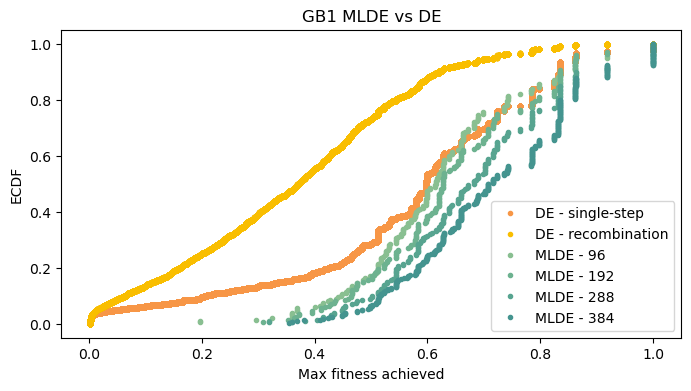

In [25]:
plt.figure(figsize=(8, 4))
plt.plot(ss_df["final_fitness"], ss_df["final_fitness ECDF"], ".", label = "DE - single-step", color = ten_colors[0])
plt.plot(recomb_df["final_fitness"], recomb_df["final_fitness ECDF"], ".", label = "DE - recombination", color = ten_colors[1])
plt.plot(mlde_df_96, ecdf_transform(mlde_df_96), ".", label = "MLDE - 96", color = ten_colors[2])
plt.plot(mlde_df_192, ecdf_transform(mlde_df_192), ".", label = "MLDE - 192", color = ten_colors[3])
plt.plot(mlde_df_288, ecdf_transform(mlde_df_288), ".", label = "MLDE - 288", color = ten_colors[4])
plt.plot(mlde_df_384, ecdf_transform(mlde_df_384), ".", label = "MLDE - 384", color = ten_colors[5])
plt.xlabel("Max fitness achieved")
plt.ylabel("ECDF")
plt.legend(loc="lower right")
plt.title("GB1 MLDE vs DE")
plt.show()

In [21]:
mlde_all["zs"].unique()

array(['Triad_score', 'esm_score', 'ev_score', 'none'], dtype=object)

In [25]:
non_zs = mlde_all[
    (mlde_all["lib"] == "GB1")
    & (mlde_all["n_mut_cutoff"] == "all")
    & (mlde_all["zs"] == "none")
    & (mlde_all["encoding"] == "one-hot")
    & (mlde_all["n_sample"] == 96)
]["top_maxes"].copy()
triad_df = mlde_all[
    (mlde_all["lib"] == "GB1")
    & (mlde_all["n_mut_cutoff"] == "all")
    & (mlde_all["zs"] == "Triad_score")
    & (mlde_all["encoding"] == "one-hot")
    & (mlde_all["n_sample"] == 96)
]["top_maxes"].copy()
esm_df = mlde_all[
    (mlde_all["lib"] == "GB1")
    & (mlde_all["n_mut_cutoff"] == "all")
    & (mlde_all["zs"] == "esm_score")
    & (mlde_all["encoding"] == "one-hot")
    & (mlde_all["n_sample"] == 96)
]["top_maxes"].copy()
ev_df = mlde_all[
    (mlde_all["lib"] == "GB1")
    & (mlde_all["n_mut_cutoff"] == "all")
    & (mlde_all["zs"] == "ev_score")
    & (mlde_all["encoding"] == "one-hot")
    & (mlde_all["n_sample"] == 96)
]["top_maxes"].copy()

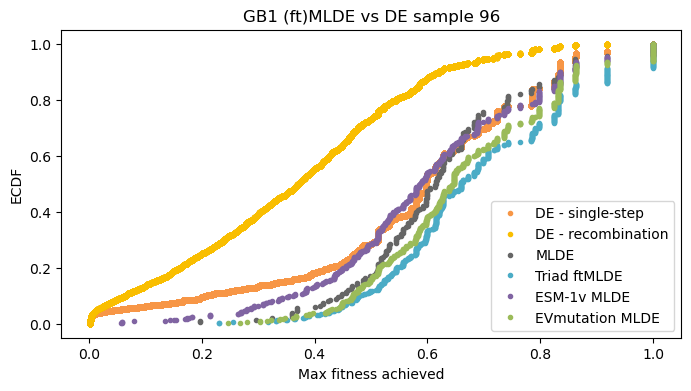

In [29]:
plt.figure(figsize=(8, 4))
plt.plot(ss_df["final_fitness"], ss_df["final_fitness ECDF"], ".", label = "DE - single-step", color = ten_colors[0])
plt.plot(recomb_df["final_fitness"], recomb_df["final_fitness ECDF"], ".", label = "DE - recombination", color = ten_colors[1])
plt.plot(non_zs, ecdf_transform(non_zs), ".", label = "MLDE", color = PRESENTATION_PALETTE_SATURATE["gray"])
plt.plot(triad_df, ecdf_transform(triad_df), ".", label = "Triad ftMLDE", color = PRESENTATION_PALETTE_SATURATE["blue"])
plt.plot(esm_df, ecdf_transform(esm_df), ".", label = "ESM-1v MLDE", color = PRESENTATION_PALETTE_SATURATE["purple"])
plt.plot(ev_df, ecdf_transform(ev_df), ".", label = "EVmutation MLDE", color = PRESENTATION_PALETTE_SATURATE["green"])
plt.xlabel("Max fitness achieved")
plt.ylabel("ECDF")
plt.legend(loc="lower right")
plt.title("GB1 (ft)MLDE vs DE sample 96")
plt.show()

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(ss_df["final_fitness"], ss_df["final_fitness ECDF"], ".", label = "DE - single-step", color = ten_colors[0])
plt.plot(recomb_df["final_fitness"], recomb_df["final_fitness ECDF"], ".", label = "DE - recombination", color = ten_colors[1])
plt.plot(mlde_df_96, ecdf_transform(mlde_df_96), ".", label = "MLDE - 96", color = ten_colors[2])
plt.plot(mlde_df_192, ecdf_transform(mlde_df_192), ".", label = "MLDE - 192", color = ten_colors[3])
plt.plot(mlde_df_288, ecdf_transform(mlde_df_288), ".", label = "MLDE - 288", color = ten_colors[4])
plt.plot(mlde_df_384, ecdf_transform(mlde_df_384), ".", label = "MLDE - 384", color = ten_colors[5])
plt.xlabel("Max fitness achieved")
plt.ylabel("ECDF")
plt.legend(loc="lower right")
plt.title("GB1 MLDE vs DE")
plt.show()

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

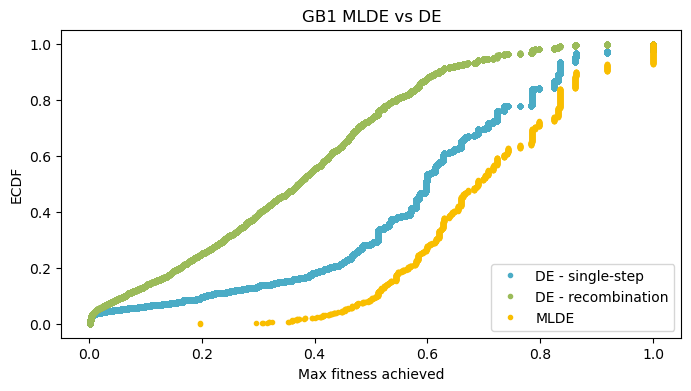

In [11]:
plt.figure(figsize=(8, 4))
plt.plot(ss_df["final_fitness"], ss_df["final_fitness ECDF"], ".", label = "DE - single-step", color = PRESENTATION_PALETTE_SATURATE["blue"])
plt.plot(recomb_df["final_fitness"], recomb_df["final_fitness ECDF"], ".", label = "DE - recombination", color = PRESENTATION_PALETTE_SATURATE["green"])
plt.plot(mlde_df["final_fitness"], mlde_df["final_fitness ECDF"], ".", label = "MLDE", color=PRESENTATION_PALETTE_SATURATE["yellow"])
plt.xlabel("Max fitness achieved")
plt.ylabel("ECDF")
plt.legend(loc="lower right")
plt.title("GB1 MLDE vs DE")
plt.show()

In [16]:
from SSMuLA.landscape_global import hamming

In [17]:
from SSMuLA.landscape_global import LIB_INFO_DICT

ss_df['n_mut'] = ss_df["start_seq"].apply(hamming, str2="".join(LIB_INFO_DICT["GB1"]["AAs"].values()))
recomb_df['n_mut'] = recomb_df["start_seq"].apply(hamming, str2="".join(LIB_INFO_DICT["GB1"]["AAs"].values()))


In [18]:
ss_df["n_mut"].unique()

array([0, 1, 2, 3, 4])

In [15]:
ss_df2 = ss_df[ss_df["n_mut"] <=2].copy()
recomb_df2 = recomb_df[recomb_df["n_mut"] <=2].copy()

In [16]:
mlde_df2 = mlde_all[(mlde_all["lib"] == "GB1") & (mlde_all["n_mut_cutoff"] == "double") & (mlde_all["zs"]== "none") & (mlde_all["encoding"] == "one-hot")].copy()

In [17]:
mlde_df2.columns

Index(['encoding', 'model', 'n_sample', 'ft_lib', 'rep', 'all_maxes',
       'all_means', 'top_maxes', 'top_means', 'ndcgs', 'rhos', 'if_truemaxs',
       'truemax_inds', 'n_mut_cutoff', 'lib', 'zs', 'n_top'],
      dtype='object')

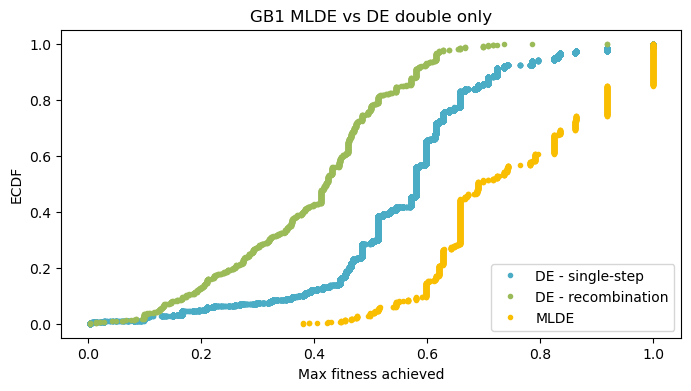

In [18]:
plt.figure(figsize=(8,4))
plt.plot(ss_df2["final_fitness"], ecdf_transform(ss_df2["final_fitness"]), ".", label = "DE - single-step", color = PRESENTATION_PALETTE_SATURATE["blue"])
plt.plot(recomb_df2["final_fitness"], ecdf_transform(recomb_df2["final_fitness"]), ".", label = "DE - recombination", color = PRESENTATION_PALETTE_SATURATE["green"])
plt.plot(mlde_df2["top_maxes"], ecdf_transform(mlde_df2["top_maxes"]), ".", label = "MLDE", color = PRESENTATION_PALETTE_SATURATE["yellow"])
plt.xlabel("Max fitness achieved")
plt.ylabel("ECDF")
plt.legend(loc="lower right")
plt.title("GB1 MLDE vs DE double only")
plt.show()

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
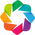

In [16]:
from SSMuLA.vis import save_plt
from SSMuLA.landscape_global import LIB_INFO_DICT, hamming, n_mut_cutoff_dict
from SSMuLA.util import checkNgen_folder

In [21]:
plot_folder = checkNgen_folder("results/de_vs_mlde/onehot/n_samples")

mlde_all = pd.read_csv("results/mlde/vis_3/all_df.csv").copy()

for lib in LIB_INFO_DICT.keys():
    ss_df_all = pd.read_csv(
        f"results/simulations/DE-active/scale2max/{lib}-single_step_DE.csv"
    )
    recomb_df_all = pd.read_csv(
        f"results/simulations/DE-active/scale2max/{lib}-recomb_SSM.csv"
    )

    # append numb mut
    # ss_df_all["n_mut"] = ss_df_all["start_seq"].apply(
    #     hamming, str2="".join(LIB_INFO_DICT[lib]["AAs"].values())
    # )
    # recomb_df_all["n_mut"] = recomb_df_all["start_seq"].apply(
    #     hamming, str2="".join(LIB_INFO_DICT[lib]["AAs"].values())
    # )
    ss_df = ss_df_all.copy()
    recomb_df = recomb_df_all.copy()

    for n_mut_cutoff in [
        0,
        1,
        2,
    ]:
        plot_title = f"{lib} MLDE vs DE {n_mut_cutoff_dict[n_mut_cutoff]}"

        if n_mut_cutoff == 0:
            mlde_df = mlde_all[
                (mlde_all["lib"] == lib)
                & (mlde_all["n_mut_cutoff"] == "all")
                & (mlde_all["zs"] == "none")
                & (mlde_all["encoding"] == "one-hot")
            ].copy()

            # ss_df = ss_df_all.copy()
            # recomb_df = recomb_df_all.copy()

        else:
            mlde_df = mlde_all[
                (mlde_all["lib"] == lib)
                & (mlde_all["n_mut_cutoff"] == n_mut_cutoff_dict[n_mut_cutoff])
                & (mlde_all["zs"] == "none")
                & (mlde_all["encoding"] == "one-hot")
            ].copy()

            # ss_df = ss_df_all[ss_df_all["n_mut"] <= n_mut_cutoff].copy()
            # recomb_df = recomb_df_all[recomb_df_all["n_mut"] <= n_mut_cutoff].copy()

        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(
            ss_df["final_fitness"],
            ecdf_transform(ss_df["final_fitness"]),
            ".",
            label="DE - single-step",
            color=ten_colors[0],
        )
        ax.plot(
            recomb_df["final_fitness"],
            ecdf_transform(recomb_df["final_fitness"]),
            ".",
            label="DE - recombination",
            color=ten_colors[1],
        )

        for n, n_samples in enumerate([24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]):
            # [24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
            mlde_df_n = mlde_df[mlde_df["n_sample"] == n_samples]["top_maxes"]
            ax.plot(
                mlde_df_n,
                ecdf_transform(mlde_df_n),
                ".",
                label=f"MLDE - {str(n_samples)}",
                color=ten_colors[n + 2],
            )

        # ax.plot(
        #     mlde_df["top_maxes"],
        #     ecdf_transform(mlde_df["top_maxes"]),
        #     ".",
        #     label="MLDE",
        #     color=PRESENTATION_PALETTE_SATURATE["yellow"],
        # )
        plt.xlabel("Max fitness achieved")
        plt.ylabel("ECDF")
        plt.legend(loc="upper left", bbox_to_anchor=(1,1))
        plt.title(plot_title)

        save_plt(
            fig,
            plot_title=plot_title,
            path2folder=plot_folder,
        )

In [37]:
mlde_all["zs"].unique()

array(['Triad_score', 'esm_score', 'ev_score', 'none'], dtype=object)

In [41]:
# combine all in one
# Create the figure and subplots

plot_folder = checkNgen_folder("results/de_vs_mlde/onehot/collage/n_samples")
mlde_all = pd.read_csv("results/mlde/vis_3/all_df.csv").copy()

for zs, mlde_title in zip(
    ["Triad_score", "esm_score", "ev_score", "none"],
    ["Triad-ftMLDE", "ESM-ftMLDE", "EVmutation-ftMLDE", "MLDE"]
):

    sup_title = f"{mlde_title} vs DE"

    fig, axs = plt.subplots(3, 4, figsize=(28, 16))

    for i, (ax, lib) in enumerate(zip(axs.flatten(), LIB_INFO_DICT.keys())):

        ss_df_all = pd.read_csv(
            f"results/simulations/DE-active/scale2max/{lib}-single_step_DE.csv"
        )
        recomb_df_all = pd.read_csv(
            f"results/simulations/DE-active/scale2max/{lib}-recomb_SSM.csv"
        )

        ss_df = ss_df_all.copy()
        recomb_df = recomb_df_all.copy()

        mlde_df = mlde_all[
            (mlde_all["lib"] == lib)
            & (mlde_all["n_mut_cutoff"] == "all")
            & (mlde_all["zs"] == zs)
            & (mlde_all["encoding"] == "one-hot")
        ].copy()

        ax.plot(
            ss_df["final_fitness"],
            ecdf_transform(ss_df["final_fitness"]),
            ".",
            label="DE - single-step",
            color=ten_colors[0],
        )
        ax.plot(
            recomb_df["final_fitness"],
            ecdf_transform(recomb_df["final_fitness"]),
            ".",
            label="DE - recombination",
            color=ten_colors[1],
        )

        for n, n_samples in enumerate([24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]):
            # [24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
            mlde_df_n = mlde_df[mlde_df["n_sample"] == n_samples]["top_maxes"]
            ax.plot(
                mlde_df_n,
                ecdf_transform(mlde_df_n),
                ".",
                label=f"{mlde_title} - {str(n_samples)}",
                color=ten_colors[n + 2],
            )

        if i == 3:
            ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

        ax.set_title(lib)
        ax.set_xlabel("Max fitness achieved")
        ax.set_ylabel("ECDF")

    fig.suptitle(sup_title, fontsize=16, fontweight="bold", y=0.9125)

    save_plt(
        fig,
        plot_title=sup_title,
        path2folder=plot_folder,
    )

In [42]:
# combine all in one
# Create the figure and subplots

plot_folder = checkNgen_folder("results/de_vs_mlde/onehot/collage/ftMLDE")
mlde_all = pd.read_csv("results/mlde/vis_3/all_df.csv").copy()

for n in [24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]:

    sup_title = f"{str(n)} MLDE sample 12.5% ft library vs DE"

    fig, axs = plt.subplots(3, 4, figsize=(28, 16))

    for i, (ax, lib) in enumerate(zip(axs.flatten(), LIB_INFO_DICT.keys())):

        ss_df_all = pd.read_csv(
            f"results/simulations/DE-active/scale2max/{lib}-single_step_DE.csv"
        )
        recomb_df_all = pd.read_csv(
            f"results/simulations/DE-active/scale2max/{lib}-recomb_SSM.csv"
        )

        ss_df = ss_df_all.copy()
        recomb_df = recomb_df_all.copy()

        mlde_df = mlde_all[
            (mlde_all["lib"] == lib)
            & (mlde_all["n_mut_cutoff"] == "all")
            & (mlde_all["n_sample"] == n)
            & (mlde_all["encoding"] == "one-hot")
        ].copy()

        ax.plot(
            ss_df["final_fitness"],
            ecdf_transform(ss_df["final_fitness"]),
            ".",
            label="DE - single-step",
            color=ten_colors[0],
        )
        ax.plot(
            recomb_df["final_fitness"],
            ecdf_transform(recomb_df["final_fitness"]),
            ".",
            label="DE - recombination",
            color=ten_colors[1],
        )

        for zs_label, zs_color, zs in zip(
            ["MLDE", "Triad ftMLDE", "ESM ftMLDE", "EVmutation ftMLDE"],
            ["gray", "blue", "purple", "green"],
            ["none", "Triad_score", "esm_score", "ev_score"],
        ):  
            if zs == "none":
                mlde_df_n = mlde_df[
                    (mlde_df["zs"] == zs)
                ]["top_maxes"]

            else:
                mlde_df_n = mlde_df[
                    (mlde_df["zs"] == zs) & (mlde_df["ft_lib"] == mlde_df["ft_lib"].min())
                ]["top_maxes"]
            # print(mlde_df["ft_lib"].unique(), mlde_df["ft_lib"].min())
            ax.plot(
                mlde_df_n,
                ecdf_transform(mlde_df_n),
                ".",
                label=zs_label,
                color=PRESENTATION_PALETTE_SATURATE[zs_color],
            )

        if i == 3:
            ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

        ax.set_title(lib)
        ax.set_xlabel("Max fitness achieved")
        ax.set_ylabel("ECDF")

    fig.suptitle(sup_title, fontsize=16, fontweight="bold", y=0.9125)

    save_plt(
        fig,
        plot_title=sup_title,
        path2folder=plot_folder,
    )

Making results/de_vs_mlde/onehot/collage/ftMLDE ...


In [42]:
plot_folder = checkNgen_folder("results/de_vs_mlde/onehot/96_sample_mlde")

mlde_all = pd.read_csv("results/mlde/vis_3/all_df.csv").copy()

for lib in LIB_INFO_DICT.keys():
    ss_df_all = pd.read_csv(
        f"results/simulations/DE-active/scale2max/{lib}-single_step_DE.csv"
    )
    recomb_df_all = pd.read_csv(
        f"results/simulations/DE-active/scale2max/{lib}-recomb_SSM.csv"
    )

    # append numb mut
    # ss_df_all["n_mut"] = ss_df_all["start_seq"].apply(
    #     hamming, str2="".join(LIB_INFO_DICT[lib]["AAs"].values())
    # )
    # recomb_df_all["n_mut"] = recomb_df_all["start_seq"].apply(
    #     hamming, str2="".join(LIB_INFO_DICT[lib]["AAs"].values())
    # )
    ss_df = ss_df_all.copy()
    recomb_df = recomb_df_all.copy()

    for n_mut_cutoff in [
        0,
        1,
        2,
    ]:
        plot_title = (
            f"{lib} MLDE sample 96 12.5% ftlib vs DE {n_mut_cutoff_dict[n_mut_cutoff]}"
        )

        if n_mut_cutoff == 0:
            mlde_df = mlde_all[
                (mlde_all["lib"] == lib)
                & (mlde_all["n_mut_cutoff"] == "all")
                & (mlde_all["n_sample"] == 96)
                & (mlde_all["encoding"] == "one-hot")
            ].copy()

            # ss_df = ss_df_all.copy()
            # recomb_df = recomb_df_all.copy()

        else:
            mlde_df = mlde_all[
                (mlde_all["lib"] == lib)
                & (mlde_all["n_mut_cutoff"] == n_mut_cutoff_dict[n_mut_cutoff])
                & (mlde_all["n_sample"] == 96)
                & (mlde_all["encoding"] == "one-hot")
            ].copy()

            # ss_df = ss_df_all[ss_df_all["n_mut"] <= n_mut_cutoff].copy()
            # recomb_df = recomb_df_all[recomb_df_all["n_mut"] <= n_mut_cutoff].copy()

        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(
            ss_df["final_fitness"],
            ecdf_transform(ss_df["final_fitness"]),
            ".",
            label="DE - single-step",
            color=ten_colors[0],
        )
        ax.plot(
            recomb_df["final_fitness"],
            ecdf_transform(recomb_df["final_fitness"]),
            ".",
            label="DE - recombination",
            color=ten_colors[1],
        )

        for zs_label, zs_color, zs in zip(
            ["MLDE", "Triad ftMLDE", "ESM ftMLDE", "EVmutation ftMLDE"],
            ["gray", "blue", "purple", "green"],
            ["none", "Triad_score", "esm_score", "ev_score"],
        ):  
            if zs == "none":
                mlde_df_n = mlde_df[
                    (mlde_df["zs"] == zs)
                ]["top_maxes"]

            else:
                mlde_df_n = mlde_df[
                    (mlde_df["zs"] == zs) & (mlde_df["ft_lib"] == mlde_df["ft_lib"].min())
                ]["top_maxes"]
            # print(mlde_df["ft_lib"].unique(), mlde_df["ft_lib"].min())
            ax.plot(
                mlde_df_n,
                ecdf_transform(mlde_df_n),
                ".",
                label=zs_label,
                color=PRESENTATION_PALETTE_SATURATE[zs_color],
            )

        plt.xlabel("Max fitness achieved")
        plt.ylabel("ECDF")
        plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
        plt.title(plot_title)

        save_plt(
            fig,
            plot_title=plot_title,
            path2folder=plot_folder,
        )

In [36]:
gb1_ft = mlde_all[(mlde_all["lib"] == "GB1") & (mlde_all["n_mut_cutoff"] == "all") & (mlde_all["encoding"] == "one-hot") & (mlde_all["n_sample"] == 96)].copy()
gb1_ft

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top
27000,one-hot,boosting,96,80000,0,0.349670,0.014397,0.488287,0.074805,0.724979,0.286844,0.0,76759.0,all,GB1,Triad_score,384
27001,one-hot,boosting,96,80000,1,0.274544,0.020747,0.616087,0.040781,0.717919,0.262112,0.0,44027.0,all,GB1,Triad_score,384
27002,one-hot,boosting,96,80000,2,0.446828,0.017165,0.796777,0.045983,0.692124,0.216452,0.0,38976.0,all,GB1,Triad_score,384
27003,one-hot,boosting,96,80000,3,0.451048,0.016235,0.723981,0.118435,0.742127,0.312483,0.0,18604.0,all,GB1,Triad_score,384
27004,one-hot,boosting,96,80000,4,0.290492,0.006557,0.596367,0.041679,0.719467,0.230647,0.0,36627.0,all,GB1,Triad_score,384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059795,one-hot,ridge,96,149361,45,0.138087,0.005349,0.575348,0.099781,0.725606,0.204338,0.0,9266.0,all,GB1,none,96
1059796,one-hot,ridge,96,149361,46,0.227609,0.013203,0.624041,0.146354,0.753942,0.243916,0.0,13727.0,all,GB1,none,96
1059797,one-hot,ridge,96,149361,47,0.067666,0.004147,0.196090,0.044312,0.723130,0.255869,0.0,84636.0,all,GB1,none,96
1059798,one-hot,ridge,96,149361,48,0.131981,0.007045,0.423193,0.138842,0.735686,0.174951,0.0,23112.0,all,GB1,none,96


In [35]:
gb1_ft.ft_lib.unique()

array([ 80000,  40000,  20000, 149361])

In [36]:
gb1_ft.zs.unique()

array(['Triad_score', 'esm_score', 'ev_score', 'none'], dtype=object)

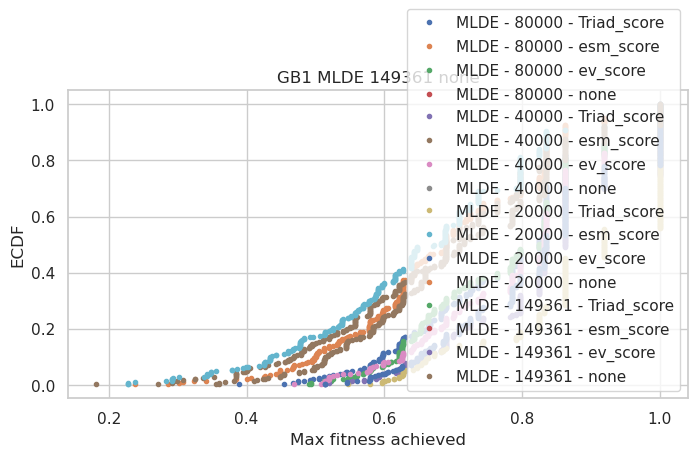

In [45]:
plt.figure(figsize=(8, 4))
for ft in gb1_ft.ft_lib.unique():
    for zs in gb1_ft.zs.unique():
        gb1_ft_sub = gb1_ft[(gb1_ft["ft_lib"] == ft) & (gb1_ft["zs"] == zs)].copy()
        plt.plot(gb1_ft_sub["top_maxes"], ecdf_transform(gb1_ft_sub["top_maxes"]), ".", label = f"MLDE - {ft} - {zs}")
        plt.xlabel("Max fitness achieved")
        plt.ylabel("ECDF")
        plt.legend(loc="lower right")
        plt.title(f"GB1 MLDE {ft} {zs}")
plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
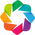

Loading BokehJS ...

In [51]:
import holoviews as hv
import bokeh

hv.extension("bokeh")

bokeh.io.output_notebook()

In [63]:
from SSMuLA.vis import save_bokeh_hv

In [ ]:
save_bokeh_hv(
    plot_obj,
    plot_name: str,
    plot_path: str,
    bokehorhv: str = "hv",
    dpi: int = 300,
    scale: int = 2,
    skippng: bool = False,
):


In [71]:
for n in [96, 384]:
    for lib in LIB_INFO_DICT.keys():
        ft_lib = mlde_all[
            (mlde_all["lib"] == lib)
            & (mlde_all["n_mut_cutoff"] == "all")
            & (mlde_all["encoding"] == "one-hot")
            & (mlde_all["n_sample"] == n)
        ].copy()
        save_bokeh_hv(
            plot_obj=hv.Violin(ft_lib, kdims=["ft_lib", "zs"], vdims="top_maxes").opts(
                width=1200, violin_fill_color="zs", title=f"{lib} sample {str(n)}"
            ),
            plot_name=lib,
            plot_path=f"results/ftmlde/{str(n)}",
        )

Making results/ftmlde/96 ...
Making results/ftmlde/384 ...


In [68]:


hv.Violin(gb1_ft, kdims=["ft_lib", "zs"], vdims="top_maxes").opts(title = "GB1", width=1200, violin_fill_color="zs")

:Violin   [ft_lib,zs]   (top_maxes)